# sinのpade近似

## 準備

In [1]:
using Pkg
Pkg.add("Plots") 

  Updating registry at `/opt/julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `/opt/julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.0/Manifest.toml`
 [no changes]


In [2]:
using Plots
ENV["PLOTS_TEST"] = false

┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


false

In [3]:
Pkg.add("BenchmarkTools")
using BenchmarkTools

 Resolving package versions...
  Updating `/opt/julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.0/Manifest.toml`
 [no changes]


In [4]:
Pkg.add("SymPy")
using SymPy

 Resolving package versions...
  Updating `/opt/julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.0/Manifest.toml`
 [no changes]


In [5]:
x = Sym(:x)

x

## 普通にやってみる

sinをマクローリン展開

$$f(x) = sin(x) = \sum^{\infty}_{n=0}{\frac{(-1)^{n-1}}{(2n+1)!}x^{2n+1}} = x - \frac{x^3}{6} + \frac{x^5}{120} + O(x^7)$$

近似式を定義

$$g(x) = \frac{P(x)}{Q(x)} = \frac{a_0 + a_1x + a_2x^2 + a_3x^3}{1 + b_1x + b_2x^2 + b_3x^3}$$

等しいと仮定して

$$\begin{aligned}
  f(x) &= g(x) \\
  x - \frac{x^3}{6} + \frac{x^5}{120} &= \frac{a_0 + a_1x + a_2x^2 + a_3x^3}{1 + b_1x + b_2x^2 + b_3x^3} \\
  \left(x - \frac{x^3}{6} + \frac{x^5}{120}\right)(1 + b_1x + b_2x^2 + b_3x^3) &= a_0 + a_1x + a_2x^2 + a_3x^3
\end{aligned}$$

$P(x)$ の次数 $m$ , $Q(x)$ の次数 $n$ とすると, $x^{m+n}$ までの係数までの係数を比較。

$$\begin{aligned}
a_0 &= 0 \\
a_1 &= 1 \\
a_2 &= b_1 \\
a_3 &= b_2 - \frac{1}{6} \\
b_3 - \frac{1}{6}b_1 &= 0 \\
-\frac{1}{6}b_2 + \frac{1}{120} &= 0 \\
-\frac{1}{6}b_3 + \frac{1}{120}b_1 &= 0
\end{aligned}$$

これを解いて

$$
g(x) = \frac{x - \frac{7}{60}x^3}{1+\frac{1}{20}x^2}
$$

In [6]:
function padesin1(x)
    (x - 7/60*x^3)/(1 + 1/20*x^2)
end

padesin1 (generic function with 1 method)

In [7]:
padesin1(x)

                     3    
- 0.116666666666667⋅x  + x
──────────────────────────
             2            
       0.05⋅x  + 1        

In [8]:
simplify(padesin1(x))

  ⎛                     2    ⎞
x⋅⎝- 0.116666666666667⋅x  + 1⎠
──────────────────────────────
               2              
         0.05⋅x  + 1          

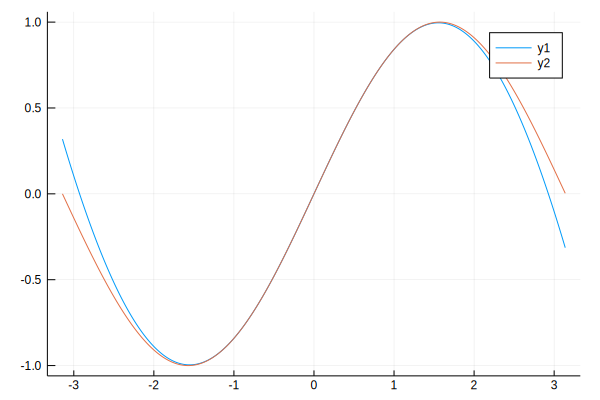

In [9]:
t = collect(-pi:0.01:pi)
y = [padesin1(i) for i in t]
y = hcat(y, [sin(i) for i in t])
plot(t, y)

## ここまでで思ったこと

- なんか項数へってね？
- sin が奇関数であることを利用できないか.

## 有理関数が奇関数となるためには

有理関数

$$\begin{aligned}
f(x) &= \frac{P(x)}{Q(x)} \\
P(x) &= p_0 + p_1x + p_2x^2 + p_3x^3 \cdots \\
Q(x) &= 1   + q_1x + q_2x^2 + q_3x^3 \cdots
\end{aligned}$$

$f(x)$が奇関数であるとき$f(x) = -f(-x)$であるから

$$\begin{aligned}
\frac{P(x)}{Q(x)} &= - \frac{P(-x)}{Q(-x)} \\
\frac{p_0 + p_1x + p_2x^2 + p_3x^3 \cdots}{1   + q_1x + q_2x^2 + q_3x^3 \cdots} &= - \frac{p_0 - p_1x + p_2x^2 - p_3x^3 \cdots}{1 - q_1x + q_2x^2 - q_3x^3 \cdots} \\
\frac{p_0 + p_1x + p_2x^2 + p_3x^3 \cdots}{1   + q_1x + q_2x^2 + q_3x^3 \cdots} &= \frac{- p_0 + p_1x - p_2x^2 + p_3x^3 \cdots}{1 - q_1x + q_2x^2 - q_3x^3 \cdots}
\end{aligned}$$

この等式を見ると$p_{2n}$と$q_{2n+1}$を0と置くと成り立つ. 項数が減っていたのはこのせい.　

## もう一度チャレンジ

奇関数となるよう近似式を定義し、項数を増やしてみる

$$
g(x) = \frac{a_0x+a_1x^3+a_2x^5}{1+q_0x^2+q_1x^4}
$$

さっきと同じように係数比較して頑張ると

$$
g(x) = \frac{x-\frac{426}{3024}x^3+\frac{25}{6048}x^5}{1+\frac{13}{504}x^2+\frac{1}{10080}x^4}
$$

In [10]:
function padesin2(x)
    (x - 426/3024*x^3 + 25/6048*x^5)/(1 + 13/504*x^2 + 1/10080*x^4)
end

padesin2 (generic function with 1 method)

In [11]:
padesin2(x)

                     5                      3     
0.00413359788359788⋅x  - 0.140873015873016⋅x  + x 
──────────────────────────────────────────────────
                     4                       2    
9.92063492063492e-5⋅x  + 0.0257936507936508⋅x  + 1

In [12]:
simplify(padesin2(x))

  ⎛                     4                      2    ⎞
x⋅⎝0.00413359788359788⋅x  - 0.140873015873016⋅x  + 1⎠
─────────────────────────────────────────────────────
                       4                       2     
  9.92063492063492e-5⋅x  + 0.0257936507936508⋅x  + 1 

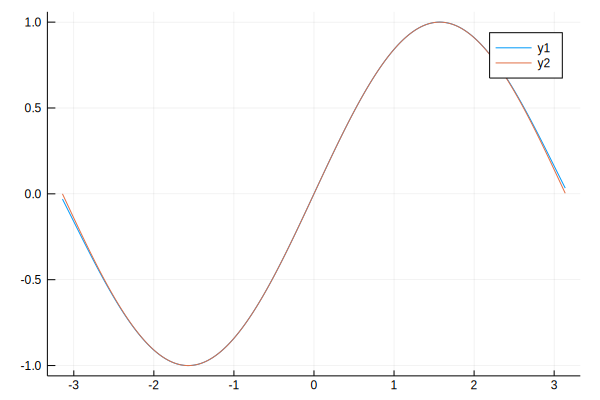

In [13]:
t = collect(-pi:0.01:pi)
y = [padesin2(i) for i in t]
y = hcat(y, [sin(i) for i in t])
plot(t, y)

## まだ気になる

よく見ると$\frac{1}{10080}x^4$は影響少なそう. なので$x^4$の項を省いて

$$
g(x) = \frac{a_0x+a_1x^3+a_2x^5}{1+q_0x^2}
$$

で近似すると

$$
g(x) = \frac{x-\frac{1}{7}x^3+\frac{11}{2520}x^5}{1+\frac{1}{42}x^2}
$$

In [14]:
function padesin3(x)
    # (x - 1/7*x^3 + 11/2520*x^5)/(1 + 1/42*x^2)
    # 計算が少なくなりそうに式変形
    x2 = x^2
    x*(11.0/60.0*x2 - 137.0/10.0 + 37044.0/60.0/(x2+42.0));
end

padesin3 (generic function with 1 method)

In [15]:
padesin3(x)

  ⎛                   2            617.4  ⎞
x⋅⎜0.183333333333333⋅x  - 13.7 + ─────────⎟
  ⎜                               2       ⎟
  ⎝                              x  + 42.0⎠

In [16]:
simplify(padesin3(x))

  ⎛⎛                   2       ⎞ ⎛ 2       ⎞        ⎞
x⋅⎝⎝0.183333333333333⋅x  - 13.7⎠⋅⎝x  + 42.0⎠ + 617.4⎠
─────────────────────────────────────────────────────
                       2                             
                      x  + 42.0                      

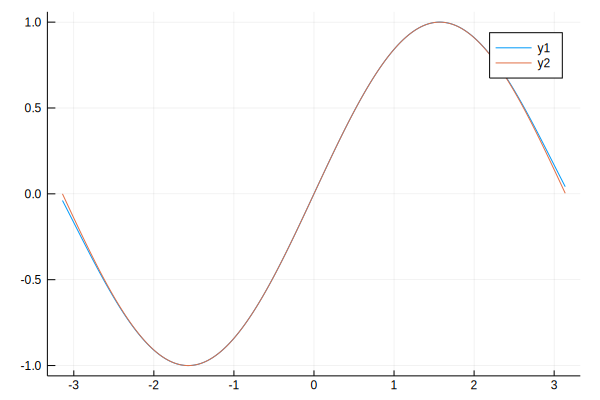

In [17]:
t = collect(-pi:0.01:pi)
y = [padesin3(i) for i in t]
y = hcat(y, [sin(i) for i in t])
plot(t, y)

## さらに式変形

近似的に因数分解してみた

In [18]:
function padesin4(angle)
    angle2 = angle^2
    return (11*angle2-252)*(angle2-10)*angle / (2520 + 60 * angle2)
end

padesin4 (generic function with 1 method)

In [19]:
padesin4(x)

  ⎛ 2     ⎞ ⎛    2      ⎞
x⋅⎝x  - 10⎠⋅⎝11⋅x  - 252⎠
─────────────────────────
           2             
       60⋅x  + 2520      

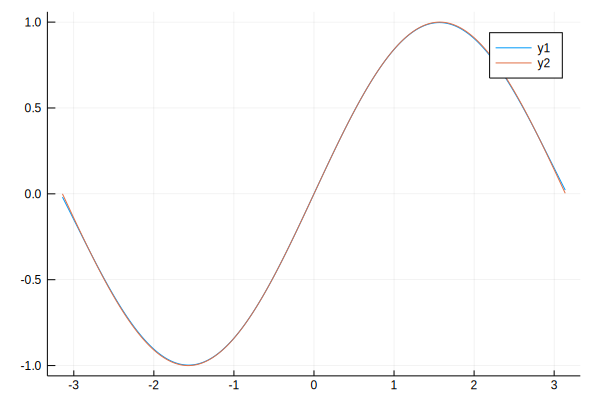

In [20]:
t = collect(-pi:0.01:pi)
y = [padesin4(i) for i in t]
y = hcat(y, [sin(i) for i in t])
plot(t, y)

In [21]:
function padesin5(angle)
    angle2 = angle^2
    return (10.8*angle2-252)*(angle2-10)*angle / (2520 + 60 * angle2)
end

padesin5 (generic function with 1 method)

In [22]:
padesin5(x)

  ⎛ 2     ⎞ ⎛      2      ⎞
x⋅⎝x  - 10⎠⋅⎝10.8⋅x  - 252⎠
───────────────────────────
            2              
        60⋅x  + 2520       

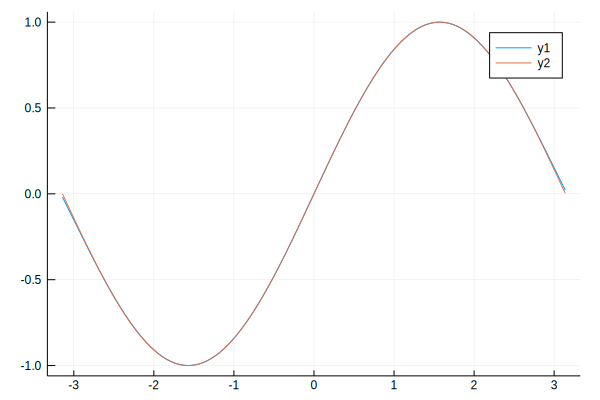

In [23]:
t = collect(-pi:0.01:pi)
y = [padesin5(i) for i in t]
y = hcat(y, [sin(i) for i in t])
plot(t, y)

## $\pm\pi$ で連続的につながるような関数

$\pm\pi$で0かつ傾きが同じだったらきれいになりそうな感じがしたので、条件に加える。

$$
\begin{aligned}
g(x) &= \frac{p_0x+p_1x^3+p_2x^5}{1+q_0x^2+q_1x^4} \\
     &= x-\frac{x^3}{6}+\frac{x^5}{120} \\
g(\pi) &= g(-\pi) = 0 \\
g'(\pi) &= g'(-\pi) = \sin'(\pi)
\end{aligned}
$$

めんどくさくなりそうな気がしたので、juliaに連立方程式を解かせる。

In [24]:
a = [1 0      0      0      0     ;
     0 1      0      -1     0     ;
     0 0      1      1/6    -1    ;
     1 2*pi^2 5*pi^4 0      0     ;
     1 pi^2   pi^4   0      0      ]

5×5 Array{Float64,2}:
 1.0   0.0       0.0      0.0        0.0
 0.0   1.0       0.0     -1.0        0.0
 0.0   0.0       1.0      0.166667  -1.0
 1.0  19.7392  487.045    0.0        0.0
 1.0   9.8696   97.4091   0.0        0.0

In [25]:
b = [1, -1/6, 1/120, -1, 0]

5-element Array{Float64,1}:
  1.0                 
 -0.16666666666666666 
  0.008333333333333333
 -1.0                 
  0.0                 

In [26]:
xs = a\b

5-element Array{Float64,1}:
  1.0                  
 -0.10132118364233778  
 -0.0                  
  0.06534548302432888  
  0.0025575805040548138

In [27]:
function padesin6(x)
    global xs
    x2 = x^2
    x * (xs[1] + x2*xs[2])/(1 + x2*(xs[4]+ xs[5]*x2))
end

padesin6 (generic function with 1 method)

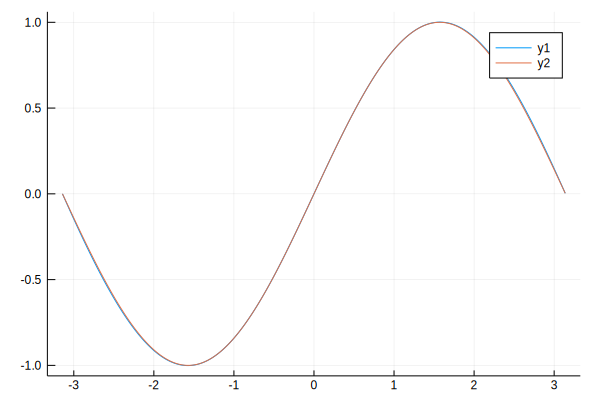

In [28]:
t = collect(-pi:0.01:pi)
y = [padesin6(i) for i in t]
y = hcat(y, [sin(i) for i in t])
plot(t, y)

## 参考
- [Padé Approximant - WolframMathWorld](http://mathworld.wolfram.com/PadeApproximant.html)
- [Cosecant - WolframMathWorld](http://mathworld.wolfram.com/Cosecant.html)
- [pade.mws](http://homepages.math.uic.edu/~jan/MCS471/Lec25/pade.html)